# Advanced Lane Finding 

In [7]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
from collections import deque
%matplotlib inline

## Step 1: Distortion correction

Firstly I will use cv2.findChessboardCorners() and cv2.drawChessboardCorners() to find and draw the inside corners in those chessboards.

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(721, 1281, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(721, 1281, 3)
(720, 1280, 3)
(720, 1280, 3)


TypeError: Invalid dimensions for image data

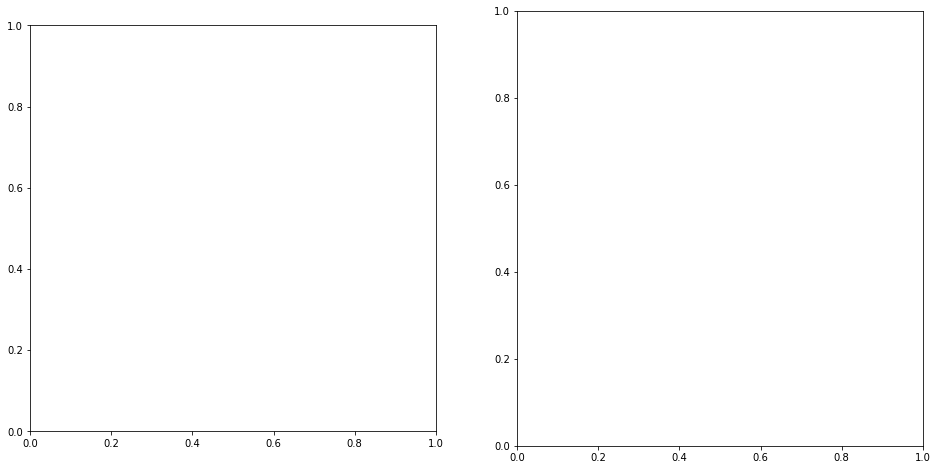

In [63]:
class Calibration:
    def __init__(self, nx, ny):
        # nx represents the number of inside corners in x
        self.nx, self.ny = nx, ny
        self.objpoints = [] # 3d points in real world space
        self.imgpoints = [] # 2d points in image plane
        self.cal_imgs = []
        self.cal_imgs_with_corners = []
        self.test_imgs = []

    def load_cal_imgs(self, cal_path):
        cal_img_names = glob.glob(cal_path)
        self.cal_imgs = [cv2.imread(name) for name in cal_img_names]

    def load_test_imgs(self, test_path):
        test_img_names = glob.glob(test_path)
        self.test_imgs = [cv2.imread(name) for name in test_img_names]

    def draw_corners(self):
        objp = np.zeros((6*9,3), np.float32)
        objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

        for img in self.cal_imgs:
            # Convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (self.nx, self.ny), None)

            # If found, draw corners
            if ret == True:
                orig_img = img.copy()
                self.objpoints.append(objp)
                self.imgpoints.append(corners)

                # Draw the corners
                cv2.drawChessboardCorners(img, (self.nx, self.ny), corners, ret)
                self.cal_imgs_with_corners.append(((orig_img, img)))
   
    def show_plot(self):
        for orig_img, img in enumerate(self.cal_imgs_with_corners):
            f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
            ax1.imshow(orig_img)
            ax1.set_title('Original Image', fontsize=18)
            ax2.imshow(img)
            ax2.set_title('Image With Corners', fontsize=18)

            
cal = Calibration(9, 6)
cal.load_cal_imgs('camera_cal/calibration*.jpg')
cal.draw_corners()
cal.show_plot()

Next I will use undistort() to calculate camera calibration matrix and distortion coefficients. It can remove distortion of image and output the undistorted image.

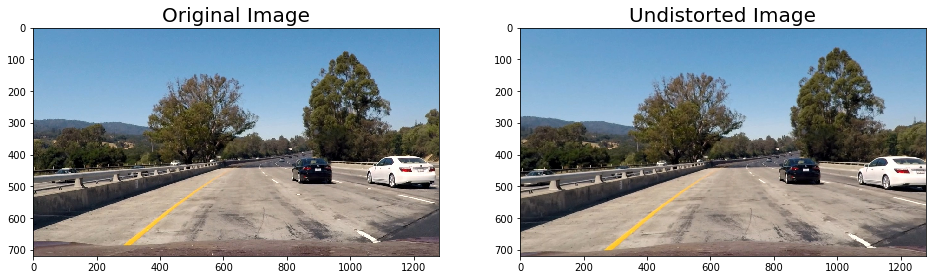

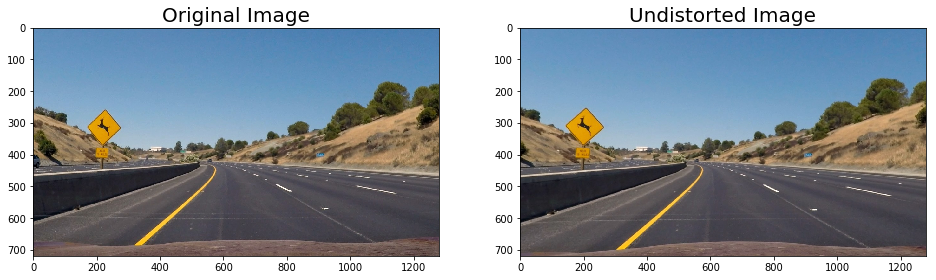

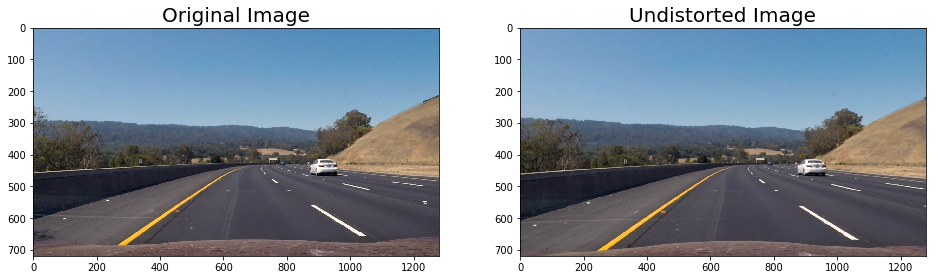

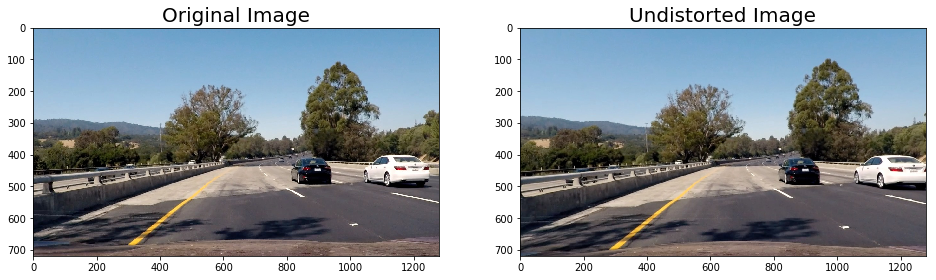

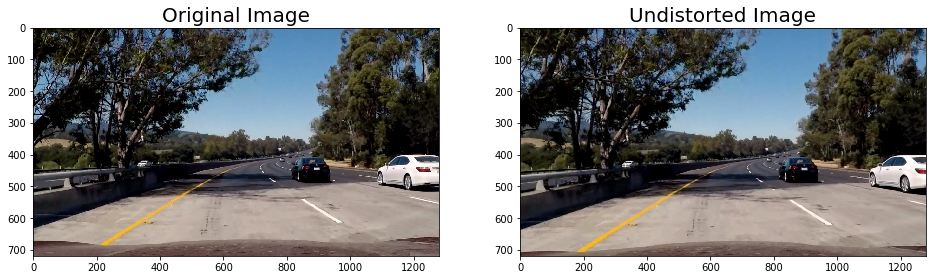

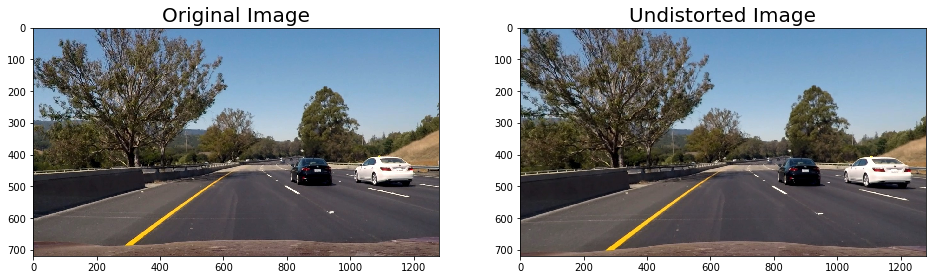

In [10]:
def undistort(image, show=True, read = True):
    if read:
        img = cv2.imread(image)
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    if show:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
        ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax1.set_title('Original Image', fontsize=20)
        ax2.imshow(cv2.cvtColor(undist, cv2.COLOR_BGR2RGB))
        ax2.set_title('Undistorted Image', fontsize=20)
    else:
        return undist

images = glob.glob('test_images/test*.jpg')
for image in images:
    undistort(image)